<a href="https://colab.research.google.com/github/jjAguil/Tareas-Simulacion/blob/main/grafica_de_escalones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from random import expovariate
from statistics import mean 
from math import inf as Infinity
import numpy
from random import expovariate
from matplotlib.pyplot import *
from random import seed
from math import inf as Infinity
from statistics import mean

Retraso promedio =  1.4389


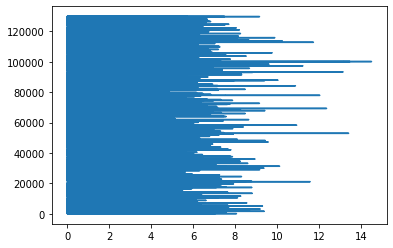

In [4]:
# Parametros

lamda = 1.3                         # Razón de arrivos (1/Lambda)  Ojo
mu = 2.0                            # Razón de salida (1/Mu)       Ojo


#Num_Pkts = 100000                   # Numero de paquetes a simular
T = 100000
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales

#while count < Num_Pkts:
while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        N = N + 1.0
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         # Evento de salida
        t = ts 
        ts_Data.append(t)
        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:

z=[]
h=0
for i in range(count):
  z.append(h)
  h=h+1
#for i in range(Num_Pkts):
for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)
    

print( "Retraso promedio = ", round( mean(r_Data), 4) )
diferencia = [e1 - e2 for e2, e1 in zip(tll_Data,ts_Data)]
step(diferencia,z)